# Aviones

## Ejemplo de cálculo de inferencia Mamdani con Python y Scikit-Fuzzy, partir del ejemplo de "Aviones" con  FuzzyClips del profesor J.A.Olivas

## Alumno: Joan Nivera Roig

### Instalación libreria scikit-fuzzy

In [1]:
# Instalación libreria scikit-fuzzy
#!pip install -U scikit-fuzzy

# https://pythonhosted.org/scikit-fuzzy/

### Importación de librerias

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

### Funciones auxiliares de lógica borrosa

In [3]:
# Funciones booleanas aplicadas la lógica borrosa
def fl_and(*args):
    return np.fmin.reduce([fl_val for fl_val in args])

def fl_or(*args):
    return np.fmax.reduce([fl_val for fl_val in args])

def fl_not(fl_val, fl_max=1):
    return fl_max - fl_val

# Función que limita o corta un conjunto borroso
def fl_fscut(fuzzy_set, fl_lim):
    return np.fmin(fuzzy_set, fl_lim)

### Definición de los universos del discurso

In [4]:
# Generar el universo del discurso de las variables de entrada
# Universo de la variables de los sensores de la alas (V1 y V2)
x_v1 = np.arange(0, 7, 1)
x_v2 = np.arange(0, 7, 1)

# Generar el universo del discurso de la variable de salida
# Universo de la variable de la potencia de los motores (PM)
x_pm = np.arange(0, 10.05, 0.1)

### Definición de los conjuntos borrosos de entrada y de salida

In [5]:
# Generar funciones de pertenencia de V1 (entrada)
v1_baja = fuzz.trapmf(x_v1, [0, 0, 1, 3])
v1_media = fuzz.trimf(x_v1, [1, 3, 5])
v1_alta = fuzz.trapmf(x_v1, [3, 5, 6, 6])

# Generar funciones de pertenencia de V2 (entrada)
v2_baja = fuzz.trapmf(x_v2, [0, 0, 1, 3])
v2_media = fuzz.trimf(x_v2, [1, 3, 5])
v2_alta = fuzz.trapmf(x_v2, [3, 5, 6, 6])

# Generar funciones de pertenencia de PM (salida)
pm_muy_baja = fuzz.trapmf(x_pm, [0, 0, 1, 3])
pm_baja = fuzz.trimf(x_pm, [1, 3, 5])
pm_media = fuzz.trimf(x_pm, [3, 5, 7])
pm_alta = fuzz.trimf(x_pm, [5, 7, 9])
pm_muy_alta = fuzz.trapmf(x_pm, [7, 9, 10, 10])

### Representación gráfica de los conjuntos borrosos de entrada

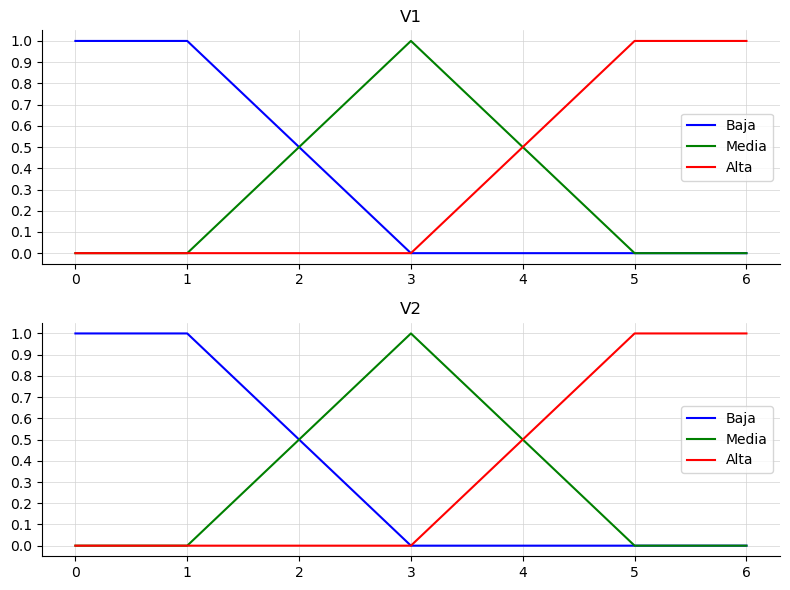

In [6]:
# Representar los universos y las funciones de pertenencia
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 6))

ax0.plot(x_v1, v1_baja, color='blue', linewidth=1.5, label='Baja')
ax0.plot(x_v1, v1_media, color='green', linewidth=1.5, label='Media')
ax0.plot(x_v1, v1_alta, color='red', linewidth=1.5, label='Alta')
ax0.set_title('V1')
ax0.legend()

ax1.plot(x_v2, v2_baja, color='blue', linewidth=1.5, label='Baja')
ax1.plot(x_v2, v2_media, color='green', linewidth=1.5, label='Media')
ax1.plot(x_v2, v2_alta, color='red', linewidth=1.5, label='Alta')
ax1.set_title('V2')
ax1.legend()
 
# Representar funciones de pertenencia de los conjuntos de entrada
for ax in (ax0, ax1):
    # Ajustar los xticks a 1 y los yticks a 0.1
    ax.set_xticks(np.arange(0, 7, 1))
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    
    ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

### Representación gráfica de los conjuntos borrosos de salida

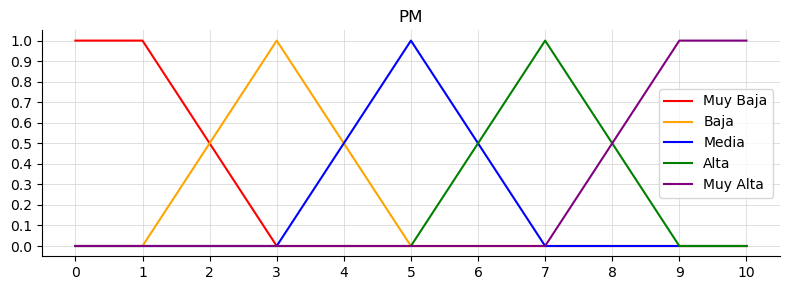

In [7]:
# Representar los universos y las funciones de pertenencia
fig1, (ax2) = plt.subplots(nrows=1, figsize=(8, 3))

ax2.plot(x_pm, pm_muy_baja, color='red', linewidth=1.5, label='Muy Baja')
ax2.plot(x_pm, pm_baja, color='orange', linewidth=1.5, label='Baja')
ax2.plot(x_pm, pm_media, color='blue', linewidth=1.5, label='Media')
ax2.plot(x_pm, pm_alta, color='green', linewidth=1.5, label='Alta')
ax2.plot(x_pm, pm_muy_alta, color='purple', linewidth=1.5, label='Muy Alta')
ax2.set_title('PM')
ax2.legend()

# Representación funciones de pertenencia de los conjuntos de salida
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()

# Ajustar los xticks a 1 y los yticks a 0.1
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 1.1, 0.1))

# Agregar un grid con líneas de color gris claro
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

### Asignación de valores a las variables de entrada

In [8]:
# Asignación de valores a las variables de entrada
v1 = 4.5
v2 = 3

### Cálculo de los grados de pertenecia a los conjuntos difusos de entrada de las variables de entrada

In [9]:
# Cálculo de los grados de pertenecia a los conjuntos difusos de entrada de las variables de entrada
gp_v1_baja = fuzz.interp_membership(x_v1, v1_baja, v1)
gp_v1_media = fuzz.interp_membership(x_v1, v1_media, v1)
gp_v1_alta = fuzz.interp_membership(x_v1, v1_alta, v1)

gp_v2_baja = fuzz.interp_membership(x_v2, v2_baja, v2)
gp_v2_media = fuzz.interp_membership(x_v2, v2_media, v2)
gp_v2_alta = fuzz.interp_membership(x_v2, v2_alta, v2)

gp_v1_baja, gp_v1_media, gp_v1_alta, gp_v2_baja, gp_v2_media, gp_v2_alta

(0.0, 0.25, 0.75, 0.0, 1.0, 0.0)

### Base de reglas

In [10]:
# Enunciado

# El AVION1 dispone de un controlador borroso tipo Mamdani para automatizar el proceso,
# que utiliza como criterior de desborrosificación la media del máximo y la base de reglas siguiente.

# Base de reglas

# R1: Si V1 es baja  y V2 es baja  entonces potencia muy alta
# R2: Si V1 es baja  y V2 es media entonces potencia alta
# R3: Si V1 es baja  y V2 es alta  entonces potencia media
# R4: Si V1 es media y V2 es baja  entonces potencia alta
# R5: Si V1 es media y V2 es media entonces potencia media
# R6: Si V1 es media y V2 es alta  entonces potencia baja
# R7: Si V1 es alta  y V2 es baja  entonces potencia media
# R8: Si V1 es alta  y V2 es media entonces potencia baja
# R9: Si V1 es alta  y V2 es alta  entonces potencia muy baja

### Cálculo de los grados de cumplimiento de los antecedentes de las reglas

In [11]:
# Cálculo de los grados de cumplimiento de los antecedentes de las reglas (Comb. reglas AND -> Min)
R1 = fl_and(gp_v1_baja, gp_v2_baja)
R2 = fl_and(gp_v1_baja, gp_v2_media)
R3 = fl_and(gp_v1_baja, gp_v2_alta)
R4 = fl_and(gp_v1_media, gp_v2_baja)
R5 = fl_and(gp_v1_media, gp_v2_media)
R6 = fl_and(gp_v1_media, gp_v2_alta)
R7 = fl_and(gp_v1_alta, gp_v2_baja)
R8 = fl_and(gp_v1_alta, gp_v2_media)
R9 = fl_and(gp_v1_alta, gp_v2_alta)

R1, R2, R3, R4, R5, R6, R7, R8, R9

(0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.75, 0.0)

### Cálculo de los grados de cumplimiento de los consecuentes de las reglas 

In [12]:
# Cálculo de los grados de cumplimiento de los consecuentes de las reglas 
# combinando los resultados de las reglas con los mismos consecuentes (Comb. reglas -> OR -> Max.)
potencia_muy_baja = R9 
potencia_baja = fl_or(R6, R8)
potencia_media = fl_or(R3, R5, R7) 
potencia_alta = fl_or(R2, R4)
potencia_muy_alta = R1 

potencia_muy_baja, potencia_baja, potencia_media, potencia_alta, potencia_muy_alta

(0.0, 0.75, 0.25, 0.0, 0.0)

### Cálculo del conjunto borroso de salida

In [13]:
# Combinar los resultados de los conjuntos borrosos de salida usando la operación OR (máximo)
# limitados de acuerdo con los grados de cumplimiento de los consecuentes de la reglas
cb_resultado = fl_or(fl_fscut(pm_muy_baja, potencia_muy_baja), 
                     fl_fscut(pm_baja, potencia_baja), 
                     fl_fscut(pm_media, potencia_media), 
                     fl_fscut(pm_alta, potencia_alta), 
                     fl_fscut(pm_muy_alta, potencia_muy_alta))

print(cb_resultado)

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.1  0.15
 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.7  0.65 0.6  0.55 0.5  0.45
 0.4  0.35 0.3  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.2  0.15 0.1  0.05
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.  ]


### Etapa de desborrosificación del conjunto borroso resultado (Inferencia Mamdani)

In [14]:
# Desborrosificar el conjunto resultante utilizando el centro de masas (sistema del centroide)
resultado_centroide = fuzz.defuzz(x_pm, cb_resultado, mode='centroid')

# Desborrosificar el conjunto resultante utilizando la media del máximo
resultado_maximo = fuzz.defuzz(x_pm, cb_resultado, mode='mom')

# Impresión de resultados
print("Resultado Método Centroide:", resultado_centroide)
print("Resultado Método Maximo:", resultado_maximo)

Resultado Método Centroide: 3.5789473684210518
Resultado Método Maximo: 3.0


### Representacion gráfica del resultado desborrosificado

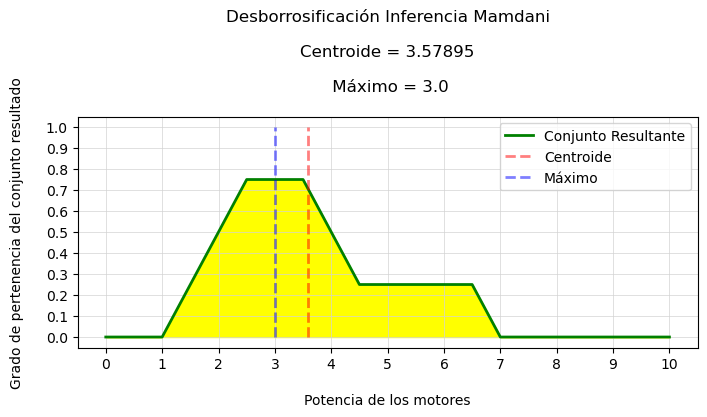

In [19]:
# Representación grafica del resultado comparando los diferentes sistemas de dsborrosificación
plt.figure(figsize=(8, 3))

plt.plot(x_pm, cb_resultado, 'green', label='Conjunto Resultante', linewidth=2)

# Rellenar el área bajo la línea verde con color amarillo
plt.fill_between(x_pm, cb_resultado, color='yellow')

plt.vlines(resultado_centroide, 0, 1, color='red', alpha=0.5, linewidth=2, 
           linestyle='dashed', label='Centroide')
plt.vlines(resultado_maximo, 0, 1, color='blue', alpha=0.5, linewidth=2, 
           linestyle='dashed',label='Máximo')

# Añadir la leyenda
plt.legend()

# Añadir las etiquetas y el título
plt.xlabel(f"\nPotencia de los motores")
plt.ylabel(f"Grado de pertenencia del conjunto resultado\n")
plt.title(f"Desborrosificación Inferencia Mamdani\n\n"\
          f"Centroide = {resultado_centroide:.6}\n\n Máximo = {resultado_maximo:.6}\n")

# Ajustar los xticks a 1 y los yticks a 0.1
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 1.1, 0.1))

# Agregar un grid con líneas de color gris claro
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)

plt.show()